In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [2]:
breast_cancer_data = load_breast_cancer()
df_features = breast_cancer_data.feature_names

In [3]:
df_data = pd.DataFrame(breast_cancer_data.data, columns = df_features)
df_labels = pd.DataFrame(breast_cancer_data.target, columns = ['label'])

In [4]:
df_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df_labels

,label
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [6]:
data = pd.concat([df_data, df_labels], axis=1)

In [7]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Text(0.5, 1.0, 'Label')

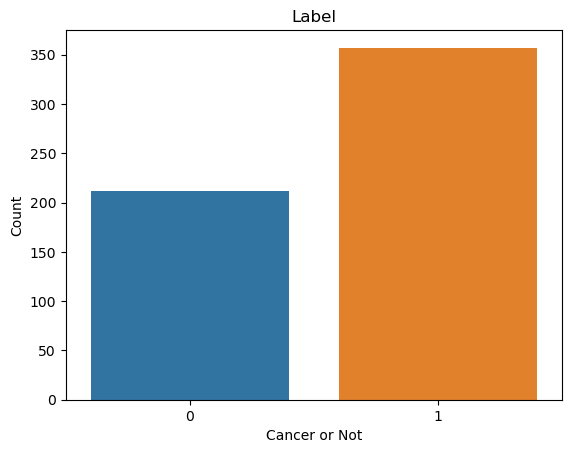

In [8]:
sns.countplot(data = data, x="label")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Label")

In [9]:
X = data.drop(['label'], axis = 1)

In [10]:
y = data['label']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.2,random_state=0)

In [13]:
X_train = X_train.to_numpy()

In [14]:
y_train = y_train.to_numpy()

In [15]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [18]:
X_val = X_val.to_numpy()
y_val = y_val.to_numpy()

In [19]:
X_train.shape

(340, 30)

In [20]:
y_train.shape

(340,)

In [115]:
X_val.shape

(86, 30)

In [94]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(40, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics=["accuracy"]
             )

In [112]:
history = model.fit(X_train, y_train,
                   epochs = 100, batch_size = 10,
                   validation_data = (X_val, y_val)
                  )

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2437 - accuracy: 0.9147 - val_loss: 0.3527 - val_accuracy: 0.9302
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.8765 - val_loss: 1.0615 - val_accuracy: 0.7674
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3747 - accuracy: 0.9206 - val_loss: 0.3401 - val_accuracy: 0.9070
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.8912 - val_loss: 0.4241 - val_accuracy: 0.8721
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.8912 - val_loss: 0.8157 - val_accuracy: 0.7907
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3586 - accuracy: 0.9206 - val_loss: 0.3860 - val_accuracy: 0.8837
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.9118 - val_loss: 1.3741 - val_accuracy: 0.6860
Epoch 8/100
3

Epoch 59/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2889 - accuracy: 0.9206 - val_loss: 0.2995 - val_accuracy: 0.9186
Epoch 60/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.9176 - val_loss: 0.2765 - val_accuracy: 0.9070
Epoch 61/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.9176 - val_loss: 0.2727 - val_accuracy: 0.9070
Epoch 62/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2808 - accuracy: 0.9265 - val_loss: 0.5114 - val_accuracy: 0.8605
Epoch 63/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3684 - accuracy: 0.9059 - val_loss: 0.5408 - val_accuracy: 0.8488
Epoch 64/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2809 - accuracy: 0.9294 - val_loss: 0.7224 - val_accuracy: 0.8372
Epoch 65/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.9118 - val_loss: 0.3595 - val_accuracy: 0.8953
Epoch 

In [113]:
history_dict = history.history
acc = history_dict['accuracy']

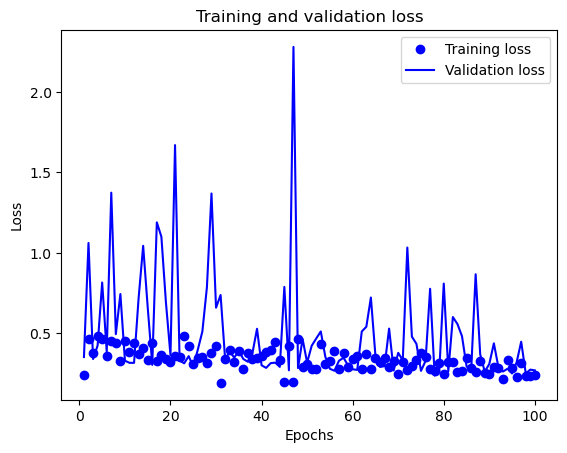

In [114]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [116]:
results = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9580
